# Exploracion Inicial de los viajes con Taxis Verdes (Setiembre 2023)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Especifica la ruta del archivo Parquet
ruta_archivo_parquet = '../Datasets/green_tripdata_2023-09.parquet' 

# Lee el archivo Parquet en un DataFrame de pandas
df_greens = pd.read_parquet(ruta_archivo_parquet)

In [4]:
df_zone_lookup = pd.read_csv('../Datasets/taxi+_zone_lookup.csv')
df_zone_lookup

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [5]:
# Combinando los dataframes
joined_df = df_greens.merge(df_zone_lookup, left_on=['PULocationID'], right_on=['LocationID'], how='left')
joined_df = joined_df.merge(df_zone_lookup, left_on=['DOLocationID'], right_on=['LocationID'], how='left')

# Eliminando columnas innecesarias
joined_df.drop(['LocationID_x', 'LocationID_y'], axis=1, inplace=True)

# Renombrando columnas
joined_df.rename(columns={'Borough_x': 'pickup_borough', 'Zone_x': 'pickup_zone', 'service_zone_x': 'pickup_service_zone',
                          'Borough_y': 'dropoff_borough', 'Zone_y': 'dropoff_zone', 'service_zone_y': 'dropoff_service_zone'}, inplace=True)

# Imprimiendo el dataframe combinado
display(joined_df.head())


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone
0,1.0,2023-09-01 00:08:04,2023-09-01 00:13:39,N,1.0,41.0,75.0,1.0,1.10,7.9,...,10.4,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem South,Boro Zone
1,1.0,2023-09-01 00:30:44,2023-09-01 00:39:30,N,1.0,74.0,236.0,1.0,1.80,10.7,...,19.1,1.0,1.0,2.75,Manhattan,East Harlem North,Boro Zone,Manhattan,Upper East Side North,Yellow Zone
2,2.0,2023-09-01 00:14:39,2023-09-01 00:38:30,N,5.0,93.0,205.0,2.0,10.52,60.0,...,61.0,1.0,2.0,0.00,Queens,Flushing Meadows-Corona Park,Boro Zone,Queens,Saint Albans,Boro Zone
3,2.0,2023-09-01 00:35:48,2023-09-01 00:56:48,N,1.0,112.0,17.0,1.0,4.72,23.3,...,35.8,1.0,1.0,0.00,Brooklyn,Greenpoint,Boro Zone,Brooklyn,Bedford,Boro Zone
4,2.0,2023-09-01 00:32:03,2023-09-01 00:43:11,N,1.0,131.0,82.0,1.0,5.95,24.0,...,26.5,2.0,1.0,0.00,Queens,Jamaica Estates,Boro Zone,Queens,Elmhurst,Boro Zone


In [6]:
# Verificar la forma del dataframe 'joined_df'
num_filas, num_columnas = joined_df.shape
print(f"Número de filas: {num_filas}")
print(f"Número de columnas: {num_columnas}")


Número de filas: 65471
Número de columnas: 26


In [11]:
columns_to_delete = ['pickup_zone', 'dropoff_zone']

# Eliminado columnas de zonas, para trabajar solo con boroughs
joined_df.drop(columns=columns_to_delete, inplace=True)


In [12]:

# Imprimir estadísticas resumidas de las columnas numéricas
columnas_numericas = joined_df.select_dtypes(include=['float64'])
estadisticas_resumidas = columnas_numericas.describe()
print(estadisticas_resumidas)


           VendorID    RatecodeID  PULocationID  DOLocationID  \
count  65471.000000  60856.000000  65471.000000  65471.000000   
mean       1.869118      1.233913     98.814299    139.706863   
std        0.337274      1.331586     58.663890     76.309643   
min        1.000000      1.000000      1.000000      1.000000   
25%        2.000000      1.000000     74.000000     74.000000   
50%        2.000000      1.000000     75.000000    138.000000   
75%        2.000000      1.000000    127.000000    220.000000   
max        2.000000     99.000000    265.000000    265.000000   

       passenger_count  trip_distance   fare_amount         extra  \
count     60856.000000   65471.000000  65471.000000  65471.000000   
mean          1.305672      24.532310     20.602176      0.881352   
std           0.952041    1419.762707     22.898428      1.365553   
min           0.000000       0.000000   -500.000000     -5.000000   
25%           1.000000       1.170000     10.000000      0.000000   


In [15]:

# Verificar valores faltantes en el dataframe 'joined_df'
valores_faltantes = joined_df.isnull().sum().sort_values(ascending=False)
porcentaje_faltante = (valores_faltantes / num_filas) * 100
print("Valores Faltantes:")
print(valores_faltantes)
print("Porcentaje de Valores Faltantes:")
print(porcentaje_faltante)


Valores Faltantes:
ehail_fee                65471
trip_type                 4621
store_and_fwd_flag        4615
RatecodeID                4615
passenger_count           4615
congestion_surcharge      4615
payment_type              4615
dropoff_service_zone       941
pickup_service_zone        191
dropoff_borough              0
pickup_borough               0
total_amount                 0
improvement_surcharge        0
VendorID                     0
tolls_amount                 0
lpep_pickup_datetime         0
mta_tax                      0
extra                        0
fare_amount                  0
trip_distance                0
DOLocationID                 0
PULocationID                 0
lpep_dropoff_datetime        0
tip_amount                   0
dtype: int64
Porcentaje de Valores Faltantes:
ehail_fee                100.000000
trip_type                  7.058087
store_and_fwd_flag         7.048922
RatecodeID                 7.048922
passenger_count            7.048922
congestion_

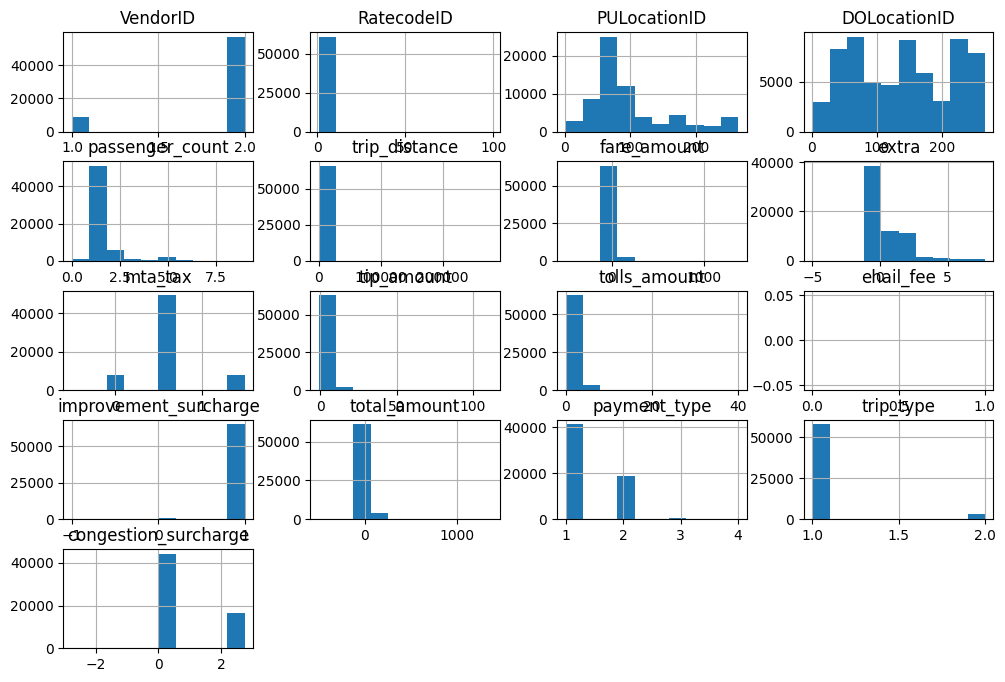

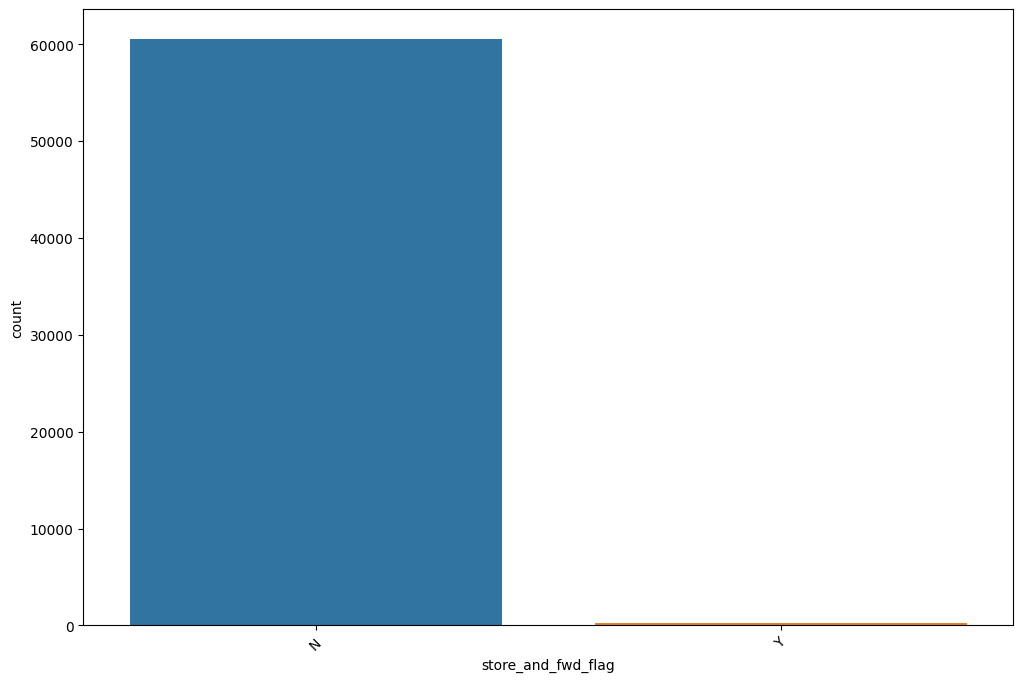

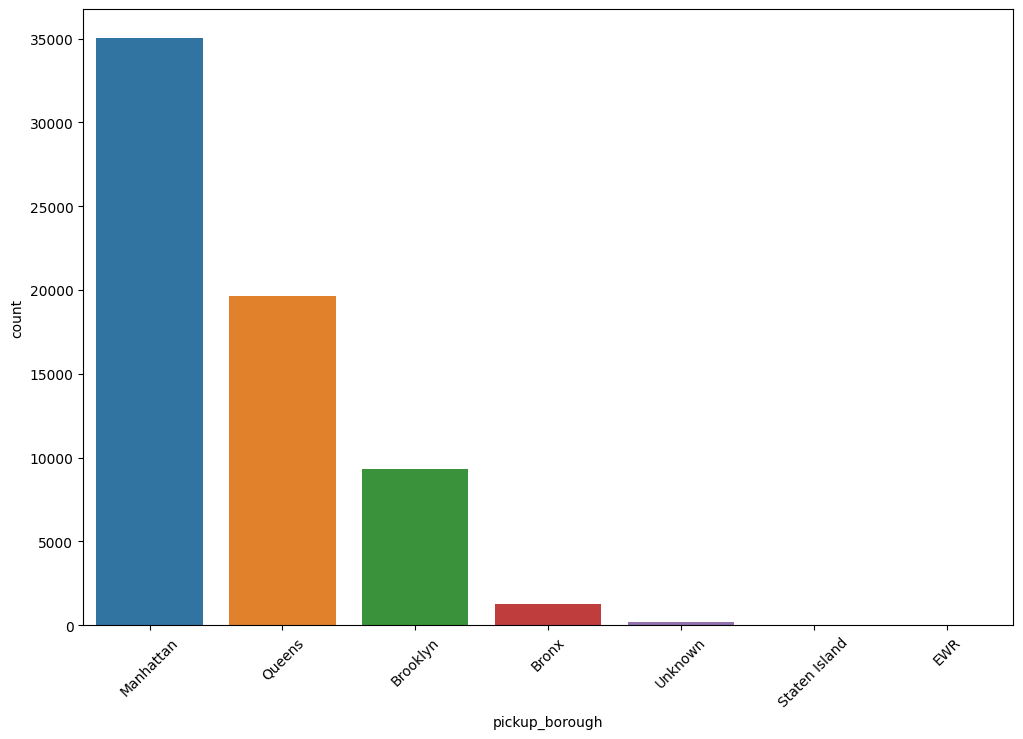

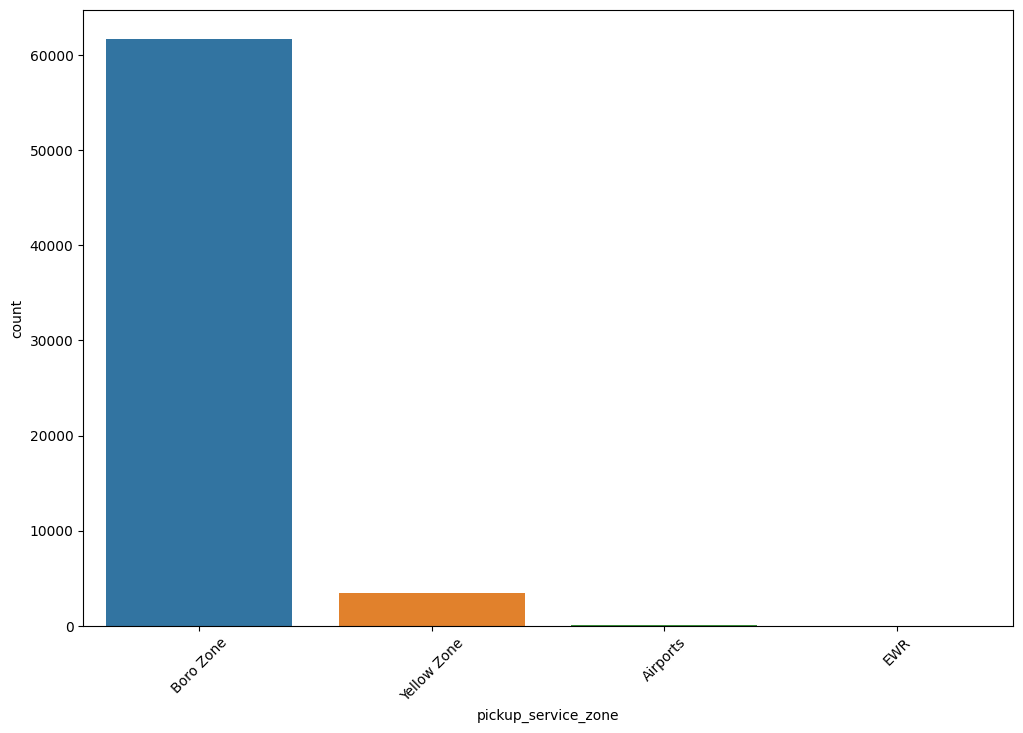

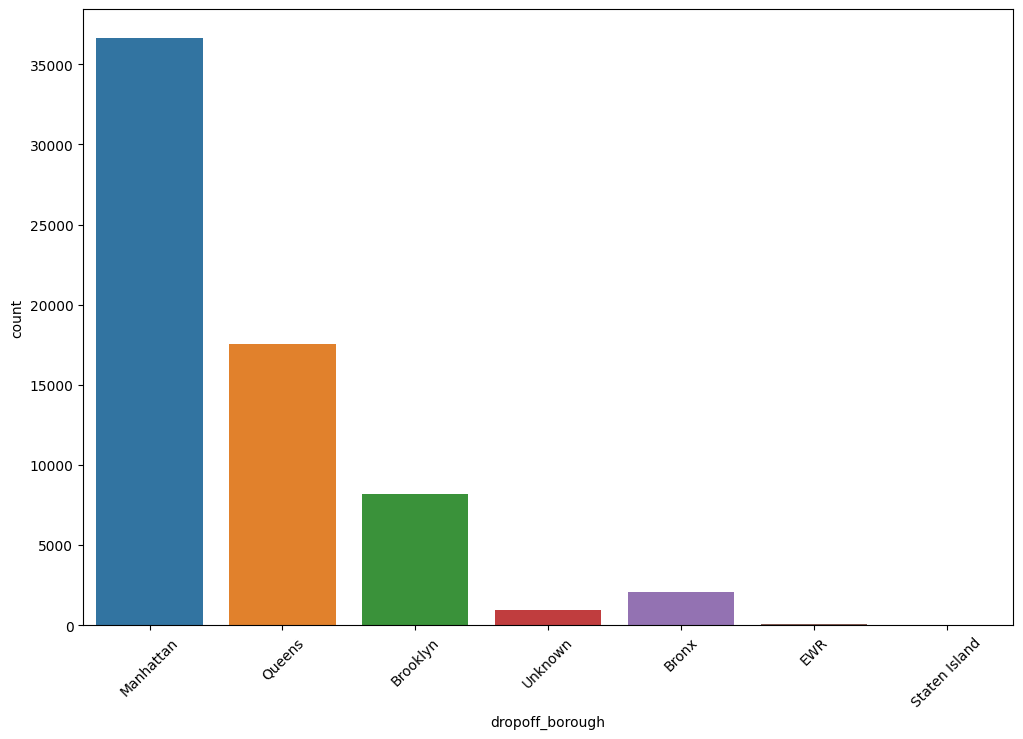

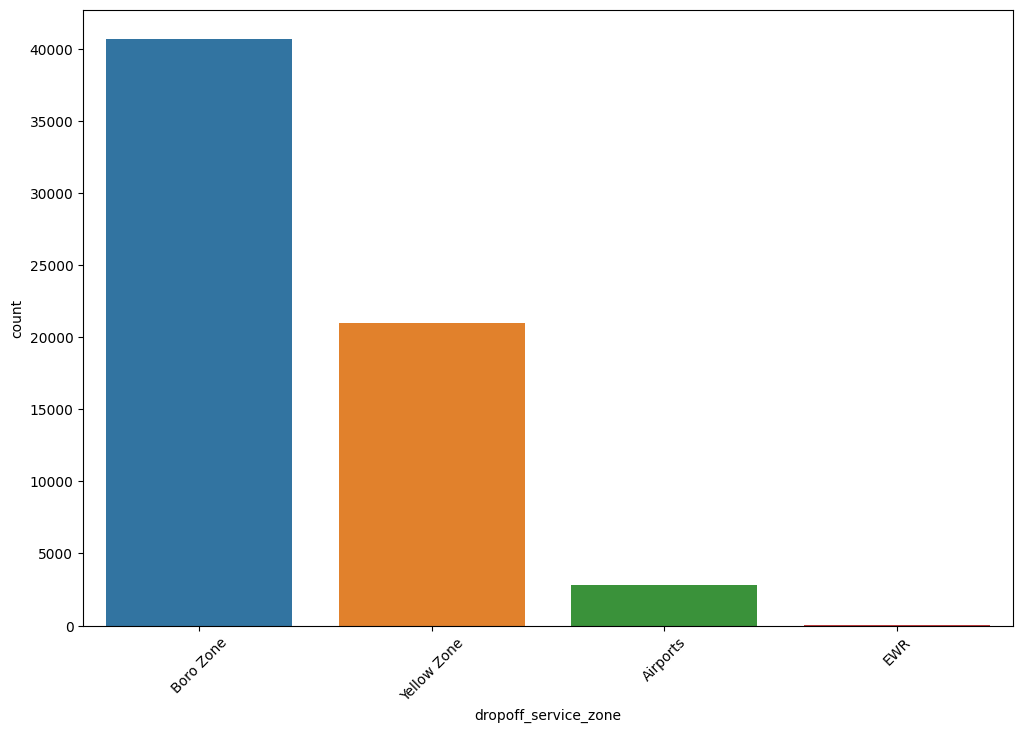

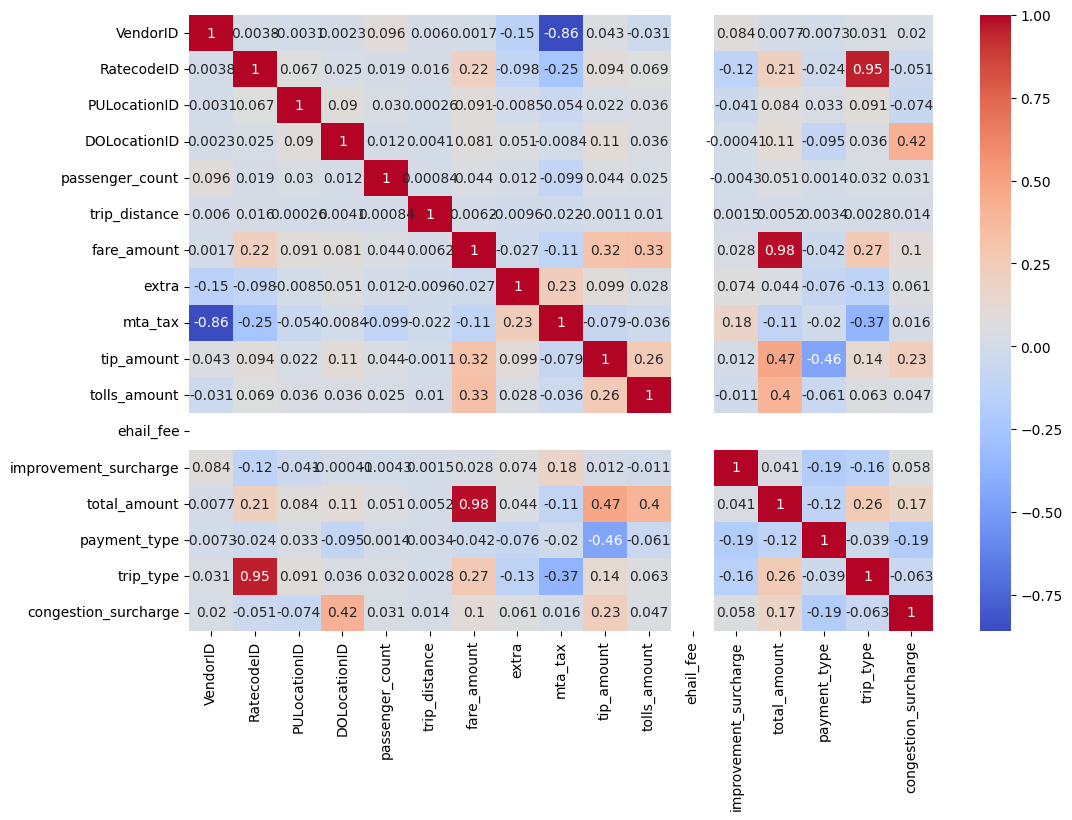

In [16]:

# Graficar histogramas para visualizar la distribución de las columnas numéricas
columnas_numericas.hist(bins=10, figsize=(12, 8))
plt.show()

# Graficar gráficos de barras para visualizar la distribución de las columnas categóricas
columnas_categoricas = joined_df.select_dtypes(include=['object'])
for col in columnas_categoricas:
    plt.figure(figsize=(12, 8))
    sns.countplot(data=joined_df, x=col)
    plt.xticks(rotation=45)
    plt.show()

# Analizar la correlación entre las columnas numéricas
matriz_correlacion = columnas_numericas.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.show()


In [23]:
# Agregar una nueva columna 'Borough_Category' basada en la comparación de las columnas 'Partida_Borough' y 'Destino_Borough'
joined_df['Borough_Category'] = joined_df.apply(lambda row: 'Intra Borough' if row['pickup_borough'] == row['dropoff_borough'] else 'Inter Borough', axis=1)

In [24]:
# Contar la cantidad de viajes Intra e Inter Boroughs
intra_borough_count = joined_df[joined_df['Borough_Category'] == 'Intra Borough'].shape[0]
inter_borough_count = joined_df[joined_df['Borough_Category'] == 'Inter Borough'].shape[0]

print(f'Cantidad de viajes Intra Boroughs: {intra_borough_count}')
print(f'Cantidad de viajes Inter Boroughs: {inter_borough_count}')


Cantidad de viajes Intra Boroughs: 55236
Cantidad de viajes Inter Boroughs: 10235


#### Distribución de Viajes dentro del mismo Borough y entre distintos Borough


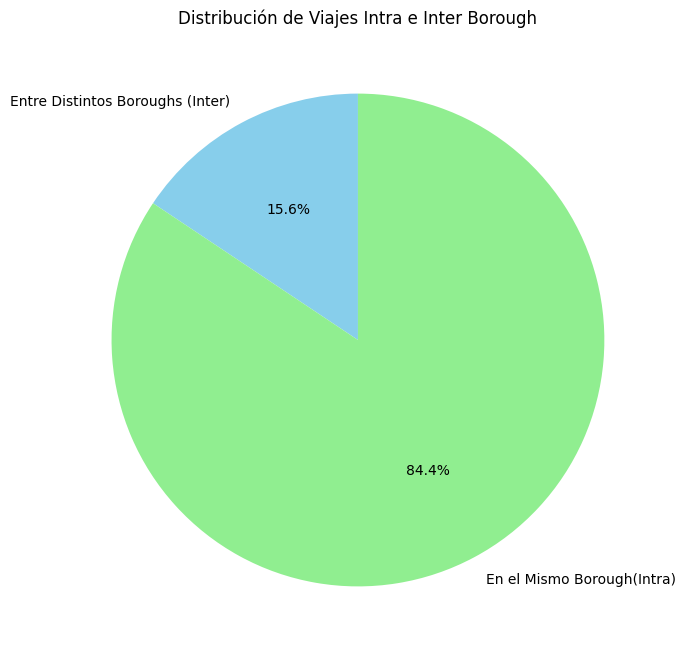

In [25]:
# que representan la cantidad de viajes entre distintas zonas y en la misma zona, respectivamente.

# Crear datos para el gráfico de torta
labels = ['Entre Distintos Boroughs (Inter)', 'En el Mismo Borough(Intra)']
sizes = [inter_borough_count, intra_borough_count]
colors = ['skyblue', 'lightgreen']

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Viajes Intra e Inter Borough')
plt.show()

### Borough con mayor/menor cantidad de INTRA viajes

In [28]:
# Filtrar solo los viajes Intra Borough
intra_borough_trips = joined_df[joined_df['Borough_Category'] == 'Intra Borough']

# Contar la cantidad de viajes Intra Borough por cada borough
intra_borough_trip_counts = intra_borough_trips['pickup_borough'].value_counts()

# Obtener el borough con mayor cantidad de viajes Intra Borough
borough_intra_max = intra_borough_trip_counts.idxmax()
cantidad_viajes_intra_max = intra_borough_trip_counts.max()

# Obtener el borough con menor cantidad de viajes Intra Borough
borough_intra_min = intra_borough_trip_counts.idxmin()
cantidad_viajes_intra_min = intra_borough_trip_counts.min()

print(f'Borough con mayor cantidad de viajes Intra Borough: {borough_intra_max} ({cantidad_viajes_intra_max} viajes)')
print(f'Borough con menor cantidad de viajes Intra Borough: {borough_intra_min} ({cantidad_viajes_intra_min} viajes)')


Borough con mayor cantidad de viajes Intra Borough: Manhattan (32126 viajes)
Borough con menor cantidad de viajes Intra Borough: EWR (1 viajes)


### Cantidad de Viajes Intra Boroughs por Borough (viaje dentro de un mismo Borough):

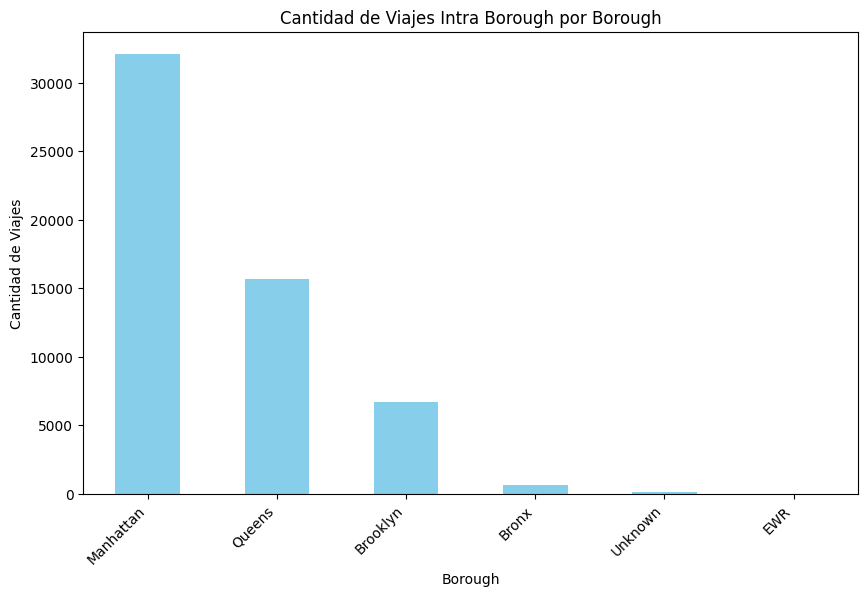

In [29]:
# Filtrar solo los viajes Intra Borough
intra_borough_trips = joined_df[joined_df['Borough_Category'] == 'Intra Borough']

# Contar la cantidad de viajes Intra Borough por cada borough
intra_borough_trip_counts = intra_borough_trips['pickup_borough'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
intra_borough_trip_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Viajes Intra Borough por Borough')
plt.xlabel('Borough')
plt.ylabel('Cantidad de Viajes')
plt.xticks(rotation=45, ha='right')
plt.show()

#### "Análisis de Viajes INTER Boroughs por Combinación de Partida y Destino"


In [30]:
# Filtrar solo los viajes Inter Borough
inter_borough_trips = joined_df[joined_df['Borough_Category'] == 'Inter Borough']

# Contar la cantidad de viajes para cada combinación de Partida_Borough y Destino_Borough
inter_borough_counts = inter_borough_trips.groupby(['pickup_borough', 'dropoff_borough']).size().reset_index(name='Cantidad_Viajes')

# Ordenar el DataFrame inter_borough_counts de mayor a menor cantidad de viajes
inter_borough_counts_sorted = inter_borough_counts.sort_values(by='Cantidad_Viajes', ascending=False)

# Mostrar el resultado ordenado
print('Cantidad de viajes para cada combinación de Partida_Borough y Destino_Borough (de mayor a menor):')
print(inter_borough_counts_sorted)


Cantidad de viajes para cada combinación de Partida_Borough y Destino_Borough (de mayor a menor):
   pickup_borough dropoff_borough  Cantidad_Viajes
20         Queens       Manhattan             2270
7        Brooklyn       Manhattan             1736
11      Manhattan           Bronx             1316
18         Queens        Brooklyn             1186
14      Manhattan          Queens             1123
8        Brooklyn          Queens              693
22         Queens         Unknown              470
2           Bronx       Manhattan              462
12      Manhattan        Brooklyn              273
16      Manhattan         Unknown              149
10       Brooklyn         Unknown              145
3           Bronx          Queens               88
17         Queens           Bronx               85
5        Brooklyn           Bronx               54
0           Bronx        Brooklyn               53
4           Bronx         Unknown               25
13      Manhattan             EWR  

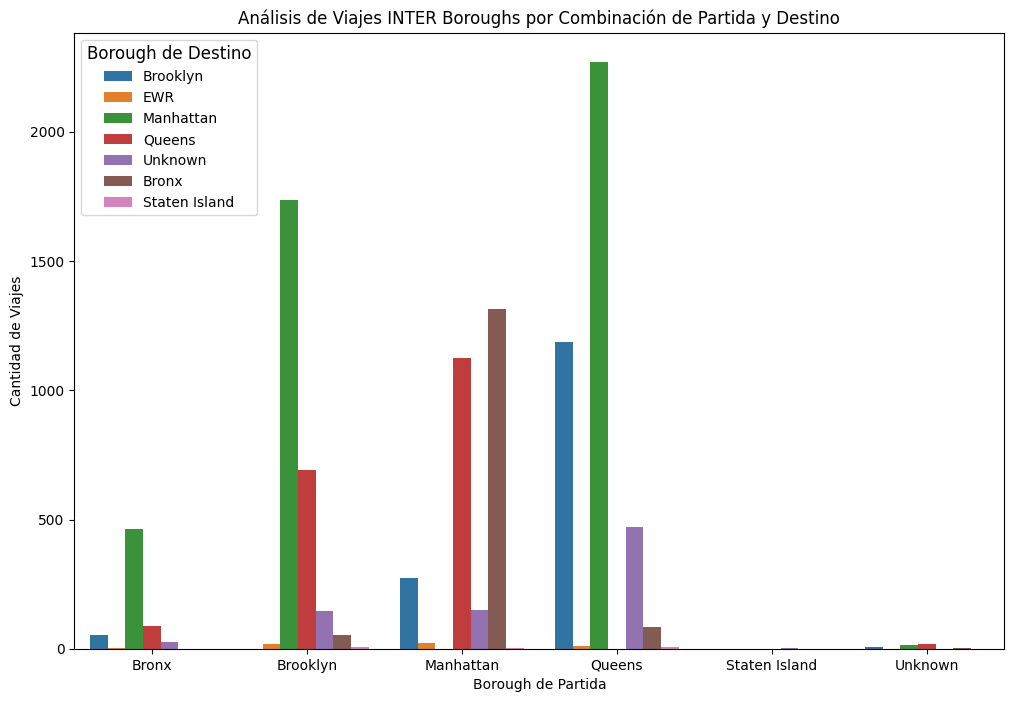

In [32]:


# Filtrar solo los viajes INTER Boroughs
inter_borough_trips = joined_df[joined_df['Borough_Category'] == 'Inter Borough']

# Contar la cantidad de viajes para cada combinación de Partida_Borough y Destino_Borough
inter_borough_counts = inter_borough_trips.groupby(['pickup_borough', 'dropoff_borough']).size().reset_index(name='Cantidad_Viajes')

# Crear un gráfico de barras con colores distintos para cada combinación
plt.figure(figsize=(12, 8))
sns.barplot(x='pickup_borough', y='Cantidad_Viajes', hue='dropoff_borough', data=inter_borough_counts)
plt.title('Análisis de Viajes INTER Boroughs por Combinación de Partida y Destino')
plt.xlabel('Borough de Partida')
plt.ylabel('Cantidad de Viajes')
plt.legend(title='Borough de Destino', title_fontsize='12')
plt.show()
